In [6]:
import cv2, imutils, time, dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils
from PIL import Image
import os 

from utils2 import *

from utils.anchor_generator import generate_anchors
from utils.anchor_decode import decode_bbox
from utils.nms import single_class_non_max_suppression

from load_model.tensorflow_loader import load_tf_model, tf_inference

from tool.utils import *
from tool.torch_utils import *
from tool.darknet2pytorch import Darknet

In [7]:
wgt5  = "shape_predictor_5_face_landmarks.dat"
wgt68 = "shape_predictor_68_face_landmarks.dat"
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread("test.jpg")
#cv2.imshow("",img)
#cv2.waitKey(0)

In [8]:
#HaarCascades Detection
#Input: grayscale image
#Output: prediction time

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def HaarPredict(gray):
    START = time.time()
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    END = time.time()
    return END-START
    
print(HaarPredict(gray))

2.6387641429901123


In [11]:
#Dlib Detection, NOTE DLIB RESIZES IMAGE TO 640x480
#Input: grayscale image
#Output: prediction time
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def hog_landmarks(image, gray, wgt):
    predictor = dlib.shape_predictor(wgt)
    h, w, _ = image.shape
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (640, 480)) # RESIZE!!!
    
    img_mean = np.array([127, 127, 127])
    img = (img - img_mean) / 128
    img = np.transpose(img, [2, 0, 1])
    img = np.expand_dims(img, axis=0)
    img = img.astype(np.float32)
    START = time.time()
    face = dlib.rectangle(left=0, top=0, right=w, bottom=h) 
    shape = predictor(gray, face)
    shape = face_utils.shape_to_np(shape)
    END = time.time()
    #print(shape)
    return(END-START)

print(hog_landmarks(img, gray, wgt68))

0.12412428855895996


In [12]:
#yolo, NOTE YOLO RESIZES IMAGE TO 640x480
#Input: grayscale image
#Output: prediction time
cfg = 'yolov3-face.cfg'
wgt = 'yolov3-wider_16000.weights'
net = cv2.dnn.readNetFromDarknet(cfg, wgt)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

def yolo(img):
    START = time.time()
    hh, ww, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, 1 / 255, (IMG_WIDTH,IMG_HEIGHT), [0, 0, 0], 1, crop=False) # RESIZE!!!
    print("Width, Height", IMG_WIDTH, IMG_HEIGHT)
    net.setInput(blob)
    outs = net.forward(get_outputs_names(net))
    faces, imageList, pixelList = post_process(img, outs, CONF_THRESHOLD, NMS_THRESHOLD)
    END = time.time()
    return END-START
  
yolo(img)

Width, Height 416 416


1.5583202838897705

In [13]:
#Reduce image quality through JPEG compression (colors "blended")
def compressMe(verbose = False):  
    picture = Image.open("test.jpg") 
    picture.save("temp.jpg", "JPEG", optimize = True,  quality = 10) 
                 
compressMe()

#Reduce image quality through resizing
out = imutils.resize(img, width = 200)
cv2.imwrite("temp2.jpg", out)
out2 = imutils.resize(out, width = 4150)
cv2.imwrite("temp3.jpg", out)

True

In [14]:
#Full Code for Reducing Image Resolution Through JPEG Compression

Compression = []
Cdlib5 = []
Cdlib68 = []
Cyolo = []
Chaar = []

NUM_IMAGES = 20

#Merge 
for i in range (5,100,10):
    print(i)
    picture = Image.open("test.jpg")
    picture.save("temp.jpg", "JPEG", optimize = True,  quality = i) 
    image = cv2.imread("temp.jpg")
    image = imutils.resize(image, width= 500)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    HAARtime = 0
    dlib5time = 0
    dlib68time = 0
    yolotime = 0
    
    for j in range (0, NUM_IMAGES):
        print(j)
        HAARtime += HaarPredict(gray)
        dlib5time += hog_landmarks(image, gray, wgt5)
        dlib68time += hog_landmarks(image, gray, wgt68)
        yolotime += yolo(image)
    
    Compression.append(i)
    Cdlib5.append(NUM_IMAGES/dlib5time)
    Cdlib68.append(NUM_IMAGES/dlib68time)
    Cyolo.append(NUM_IMAGES/yolotime)
    Chaar.append(NUM_IMAGES/HAARtime)

5
0
Width, Height 416 416
1


KeyboardInterrupt: 

In [15]:
#Full Code for Reducing Image Resolution Through Reducing Size

Resized = []
Rdlib5 = []
Rdlib68 = []
Ryolo = []
Rhaar = []

#Resize
for i in range (200,4100,100):
    print(i)
    base = cv2.imread("test.jpg")
    imagee = imutils.resize(base, width = i)
    #cv2.imwrite("temp.jpg", imagee)
    #image = cv2.imread("temp.jpg")
    gray = cv2.cvtColor(imagee, cv2.COLOR_BGR2GRAY)
    
    HAARtime = 0
    dlib5time = 0
    dlib68time = 0
    yolotime = 0
    
    for j in range (0, NUM_IMAGES):
        print(j)
        HAARtime += HaarPredict(gray)
    
    Resized.append(i)
    Rhaar.append(NUM_IMAGES/HAARtime)

200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
300
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
500
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
600
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
700
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
800
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
900
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1000
0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyboardInterrupt: 

In [161]:
Cdlib68.pop(len(Cdlib68)-1)

128.82876905876427

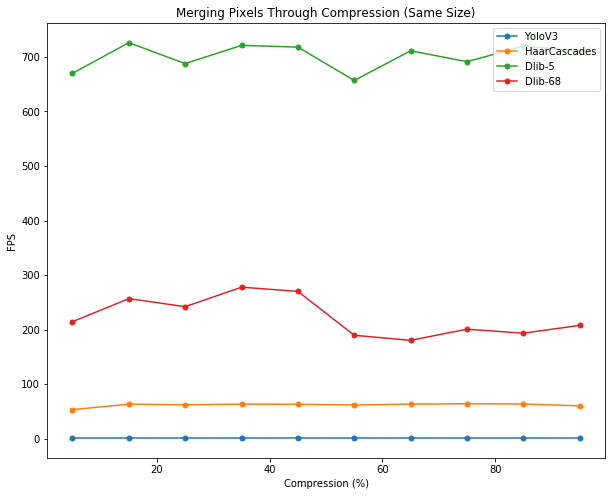

In [165]:
#Graph
plt.figure(figsize=(10,8))

plt.plot(Compression, Cyolo, '-o',label='YoloV3', markersize = 5)
plt.plot(Compression, Chaar, '-o',label='HaarCascades', markersize = 5)
plt.plot(Compression, Cdlib5, '-o', label='Dlib-5', markersize = 5)
plt.plot(Compression, Cdlib68, '-o', label='Dlib-68', markersize = 5)

plt.title('Merging Pixels Through Compression (Same Size)')
plt.legend(loc='upper right')
plt.xlabel('Compression (%)')
plt.ylabel('FPS')

plt.show()

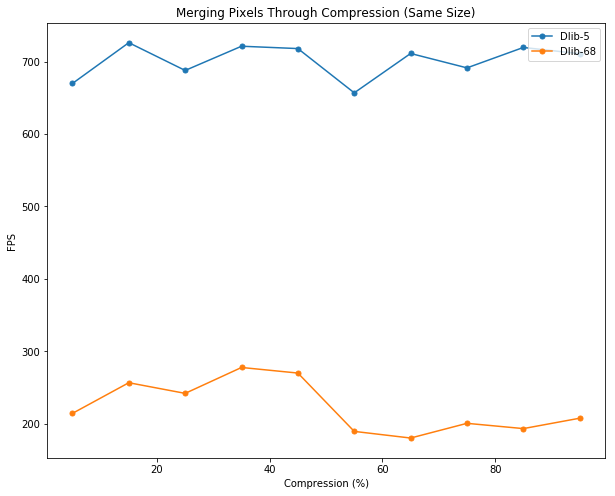

In [163]:
plt.figure(figsize=(10,8))

plt.plot(Compression, Cdlib5, '-o', label='Dlib-5', markersize = 5)
plt.plot(Compression, Cdlib68, '-o', label='Dlib-68', markersize = 5)

plt.title('Merging Pixels Through Compression (Same Size)')
plt.legend(loc='upper right')
plt.xlabel('Compression (%)')
plt.ylabel('FPS')

plt.show()

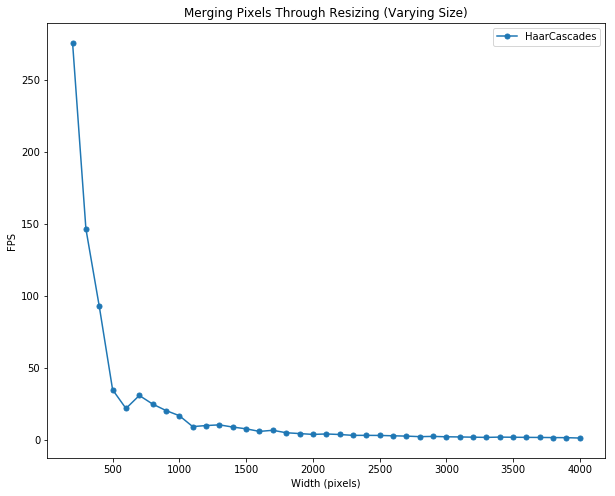

In [189]:
#Graph
plt.figure(figsize=(10,8))

#plt.plot(Resized, Ryolo, '-o',label='YoloV3', markersize = 5)
plt.plot(Resized, Rhaar, '-o',label='HaarCascades', markersize = 5)

plt.title('Merging Pixels Through Resizing (Varying Size)')
plt.legend(loc='upper right')
plt.xlabel('Width (pixels)')
plt.ylabel('FPS')

plt.show()

In [ ]:
'''
#Original
base = cv2.imread("test.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
for j in range (0, NUM_IMAGES):
    HAARtime += HaarPredict(gray)
    dlib5time += hog_landmarks(base, gray, wgt5)
    dlib68time += hog_landmarks(base, gray, wgt68)
    yolotime += yolo(base)
    
Compression.append(100)
Cdlib5.append(NUM_IMAGES/dlib5time)
Cdlib68.append(NUM_IMAGES/dlib68time)
Cyolo.append(NUM_IMAGES/yolotime)
Chaar.append(NUM_IMAGES/HAARtime)

#Original
base = cv2.imread("test.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
for j in range (0, NUM_IMAGES):
    HAARtime += HaarPredict(gray)
    dlib5time += hog_landmarks(base, gray, wgt5)
    dlib68time += hog_landmarks(base, gray, wgt68)
    yolotime += yolo(base)

Resized.append(4150)
Rdlib5.append(NUM_IMAGES/dlib5time)
Rdlib68.append(NUM_IMAGES/dlib68time)
Ryolo.append(NUM_IMAGES/yolotime)
Rhaar.append(NUM_IMAGES/HAARtime)
'''